In [1]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the Model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
# Train the Model
history = model.fit(x_train, y_train, epochs = 10,
                    validation_data = (x_test, y_test),
                    batch_size = 64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.3263 - loss: 1.8080 - val_accuracy: 0.5200 - val_loss: 1.3294
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.5585 - loss: 1.2317 - val_accuracy: 0.6214 - val_loss: 1.0808
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6285 - loss: 1.0545 - val_accuracy: 0.6530 - val_loss: 0.9887
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6677 - loss: 0.9453 - val_accuracy: 0.6795 - val_loss: 0.9240
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6960 - loss: 0.8647 - val_accuracy: 0.6757 - val_loss: 0.9108
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.7256 - loss: 0.7897 - val_accuracy: 0.6882 - val_loss: 0.8903
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7414 - loss: 0.7385 - val_accuracy: 0.6923 - val_loss: 0.8976
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7527 - loss: 0.7012 -

In [8]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 4s - 11ms/step - accuracy: 0.7088 - loss: 0.8647
Test Accuracy: 0.71


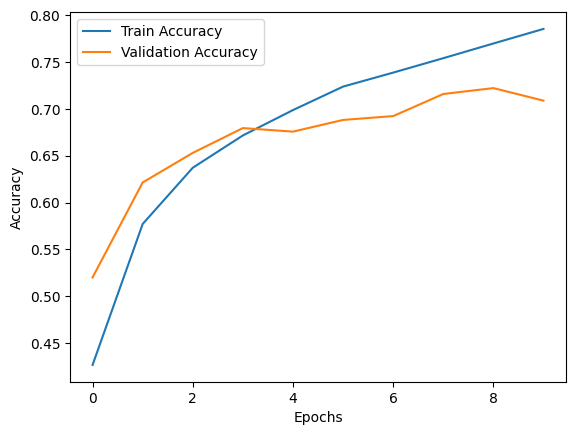

In [9]:
# Visualize Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Save and Load the Model
model.save('cifar10_cnn_model.h5')
loaded_model = tf.keras.models.load_model('cifar10_cnn_model.h5')